In [50]:
import numpy as np
import random
import copy
import matplotlib.pyplot as plt
%matplotlib inline
params = {'axes.labelsize': 15,
          'axes.titlesize': 15}
plt.rcParams.update(params)

Setting:

cluster with 2 machine types, A and B
Split them equally across subproblems.

Consider optimal solution where jobs are assigned to machine A (type A jobs) or machine B (type B jobs)
A random partitioning of jobs across sub-problems will, in expectation, match the proportion of type A and type B jobs in each subproblem.
However, there are deviations with random partitioning, and this script quantifies those.

In [51]:
# create evenly-split shuffled array with N numbers between 0 and num_types
def rand_array(N, num_types):
    arr = np.zeros(N)
    for m in range(num_types):
        start = m * (N / num_types)
        end = start + (N / num_types)
        arr[int(start):int(end)] = m
    np.random.shuffle(arr)
    return arr

def two_choice(jobs, K, num_types):
    
    num_jobs = len(jobs)
    type_count = [[0]*num_types for _ in range(K)]
    subproblem_assignments = [[] for _ in range(K)]
    num_in_subproblem = [0]*K
    num_1s_in_subproblem = [0]*K
    num_assigned = 0

    # keep track of which subproblems have not been filled up yet
    sp_indices = list(range(K))
    num_sp_in_play = K
    
    for job in jobs:
        #print("choosing from indices: " + str(sp_indices))
        # if only one job is left to fill up, give it the job
        if num_sp_in_play == 1:
            subproblem_assignments[sp_indices[0]].append(job)
            continue
        
        # choose 2 random subproblems
        sp1 = sp_indices[random.randint(0,num_sp_in_play-1)]
        sp2 = sp_indices[random.randint(0,num_sp_in_play-1)]
        while sp2 == sp1:
            sp2 = sp_indices[random.randint(0,num_sp_in_play-1)]
        
        # check which sp has less of that type
        if type_count[sp1][int(job)] < type_count[sp2][int(job)]:
            assigned_sp = sp1
        else:
            assigned_sp = sp2
               
        # assign job

        type_count[assigned_sp][int(job)] += 1
        #print("job " + str(job) + " assigned to sp " + str(assigned_sp))
        subproblem_assignments[assigned_sp].append(job)
        num_in_subproblem[assigned_sp] += 1
        num_assigned += 1
        #print(subproblem_assignments)
        
        # check if subproblem has been given its share of jobs;
        # if so, remove it from consideration
        #if num_in_subproblem[assigned_sp] >= num_jobs/K and num_sp_in_play > 1:
            #print("old sp_indices: " + str(sp_indices))
            #sp_indices.remove(assigned_sp)
            #print("new sp_indices: " + str(sp_indices))
            #num_sp_in_play -= 1
        
    return subproblem_assignments, type_count

def run_trials(N, num_machine_types, num_trials, max_K_exp, twochoice=False):
    means = [0]*(max_K_exp-1)
    stds = [0]*(max_K_exp-1)
    for i, exp in enumerate(range(1,max_K_exp)):
        K = 2**exp
        jobs = rand_array(N, num_machine_types)
        jobs_per_subproblem = N/K
        
        deviations = [0]*num_trials
        for trial in range(num_trials):
            jobs_shuffled = copy.deepcopy(jobs)
            np.random.shuffle(jobs_shuffled)
            if twochoice:
                subproblem_assignments, type_count = two_choice(jobs_shuffled, K, num_machine_types)
            else:
                # randomly assign to K subproblems
                subproblem_assignments = [[] for k in range(K)]

                for k in range(K):
                    start = int(k*jobs_per_subproblem)
                    end = int(start + jobs_per_subproblem)
                    subproblem_assignments[k] = jobs_shuffled[start:end]
            
                # count number of each job type in each subproblem
                type_count = [[0]*num_machine_types for _ in range(K)]
                for sp in range(K):
                    for job_machine_type in range(num_machine_types):
                        type_count[sp][job_machine_type] = \
                            np.count_nonzero(subproblem_assignments[sp] == job_machine_type)
            
            for sp in range(K):
                for job_machine_type in range(num_machine_types):
                    deviations[trial] += abs((jobs_per_subproblem/num_machine_types) - \
                                             type_count[sp][job_machine_type])

        means[i] = np.mean(deviations)
        stds[i] = np.std(deviations)
        print(means)
        #print(stds)
    
    means = np.asarray(means)
    stds = np.asarray(stds)
    
    #fig = plt.figure()
    #ax = plt.axes()
    #plt.bar(list(range(1,max_K_exp)), means, yerr=stds)
    #plt.xlabel('num subproblem')
    #plt.ylabel('deviation from even split')
    #plt.xticks(range(1,max_K_exp), [str(2**exp) for exp in range(1,max_K_exp)])
    return means, stds


[640.48, 0, 0, 0, 0]
[640.48, 1514.72, 0, 0, 0]
[640.48, 1514.72, 2140.96, 0, 0]
[640.48, 1514.72, 2140.96, 3202.24, 0]
[640.48, 1514.72, 2140.96, 3202.24, 4485.76]
[0.0, 0, 0, 0, 0]
[0.0, 3.04, 0, 0, 0]
[0.0, 3.04, 8.0, 0, 0]
[0.0, 3.04, 8.0, 19.64, 0]
[0.0, 3.04, 8.0, 19.64, 39.52]
[1163.84, 0, 0, 0, 0]
[1163.84, 1881.8399999999976, 0, 0, 0]
[1163.84, 1881.8399999999976, 3010.319999999999, 0, 0]
[1163.84, 1881.8399999999976, 3010.319999999999, 4484.0666666666675, 0]
[1163.84, 1881.8399999999976, 3010.319999999999, 4484.0666666666675, 6357.826666666665]
[2.666666666686069, 0, 0, 0, 0]
[2.666666666686069, 6.546666666655219, 0, 0, 0]
[2.666666666686069, 6.546666666655219, 15.18666666668316, 0, 0]
[2.666666666686069, 6.546666666655219, 15.18666666668316, 35.30666666666235, 0]
[2.666666666686069, 6.546666666655219, 15.18666666668316, 35.30666666666235, 70.21333333334762]
[1375.52, 0, 0, 0, 0]
[1375.52, 2389.0, 0, 0, 0]
[1375.52, 2389.0, 3707.28, 0, 0]
[1375.52, 2389.0, 3707.28, 5356.64, 0

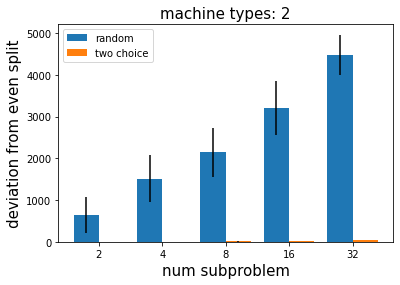

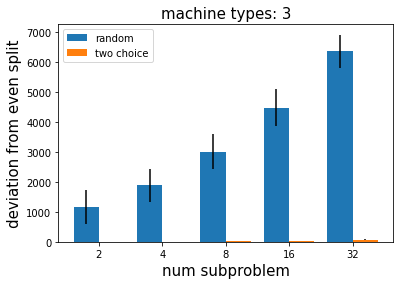

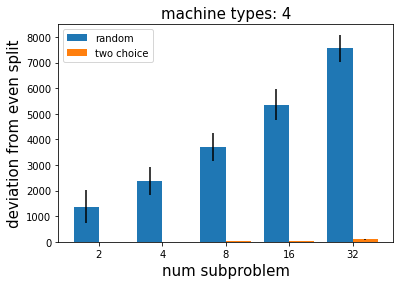

In [52]:
N = 1000000
num_machine_types = 2
num_trials = 50
max_K_exp = 6

for num_machine_types in [2,3,4]:
    rand_mean, rand_std = run_trials(N, num_machine_types, num_trials, max_K_exp, twochoice=False)
    twoc_mean, twoc_std = run_trials(N, num_machine_types, num_trials, max_K_exp, twochoice=True)

    xvals = np.asarray(range(1,max_K_exp))
    width = 0.4

    fig = plt.figure()
    ax = plt.axes()
    plt.bar(xvals-width/2, rand_mean, width, yerr=rand_std, label='random')
    plt.bar(xvals+width/2, twoc_mean, width, yerr=twoc_std, label='two choice')
    plt.xlabel('num subproblem')
    plt.ylabel('deviation from even split')
    plt.ylim(0,)
    plt.xticks(range(1,max_K_exp), [str(2**exp) for exp in range(1,max_K_exp)])
    plt.legend()
    plt.title("machine types: " + str(num_machine_types))



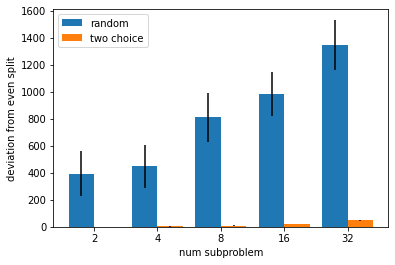

In [ ]:
print(two_choice([0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1], 3))

In [24]:
rand_array(10,5)

array([1., 2., 3., 3., 0., 0., 4., 2., 4., 1.])